In [1]:
import os
import sys
sys.path.insert(1, '/mnt/d/PowerTAC/Python/python_utils/helper') 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from statistics import mean
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
from read_mongo_collection import HelperToReadMongo

sns.set_theme(style="darkgrid")

# See complete data
pd.set_option('max_columns', None)
pd.set_option("max_rows", None)
np.set_printoptions(threshold=np.inf)

In [3]:
helper_mongo = HelperToReadMongo()

In [4]:
# Specify names of all the brokers corresponding to databases here
list_of_brokers = ['VV21', 'Sample']

rename_col = {"MCP": "Price", "LimitPrice": "Price" , "Net_Cleared_Quantity": "Quantity", \
              "Broker's_Cleared_Quantity": "Quantity", "Broker's_Bidded_Quantity": "Quantity", \
              "Market_Position": "Quantity"}

In [5]:
color_book = {'VV21': 'darkorchid', 'VidyutVanika21': 'darkorchid', 'VidyutVanika': 'slateblue', 'VV20': 'slateblue', 'VidyutVanika18': 'yellowgreen', 'VV18': 'yellowgreen', \
              'Sample': 'orchid', 'AgentUDE': 'slategray', 'SPOT': 'tomato', 'TUC_TAC': 'gold', 'MCP': 'red'}

def get_colors(list_of_brokers):
    return [color_book.get(broker) for broker in list_of_brokers]

In [6]:
vv21_market_clearing =  helper_mongo.query_to_mongo('PowerTAC2021_Wholesale_Test_VV21_SC_7', 'MarketTransaction_Info', server_ip='10.2.16.159', ssh_username='powertac', ssh_password='sanjay9397', remote=True)
sample_market_clearing =  helper_mongo.query_to_mongo('PowerTAC2021_Wholesale_Test_null_SC_7', 'MarketTransaction_Info', server_ip='10.2.16.159', ssh_username='powertac', ssh_password='sanjay9397', remote=True)

# consider only bids
# vv21_market_clearing = vv21_market_clearing[vv21_market_clearing['MCP'] < 0.0]
# sample  _market_clearing = sample_market_clearing[vv18_market_clearing['MCP'] < 0.0]

In [7]:
vv21_market_clearing['Proximity'] = vv21_market_clearing['Execution_Timeslot'] - vv21_market_clearing['Bidding_Timeslot']
sample_market_clearing['Proximity'] = sample_market_clearing['Execution_Timeslot'] - sample_market_clearing['Bidding_Timeslot']

In [8]:
vv21_market_clearing['Cost'] = vv21_market_clearing['MCP'] * vv21_market_clearing["Broker's_Cleared_Quantity"]
sample_market_clearing['Cost'] = sample_market_clearing['MCP'] * sample_market_clearing["Broker's_Cleared_Quantity"]

In [9]:
vv21_market_clearing = vv21_market_clearing[vv21_market_clearing['Game_Name'] == 'finals_2019_07_6_4444']
sample_market_clearing = sample_market_clearing[sample_market_clearing['Game_Name'] == 'finals_2019_07_6_4444']

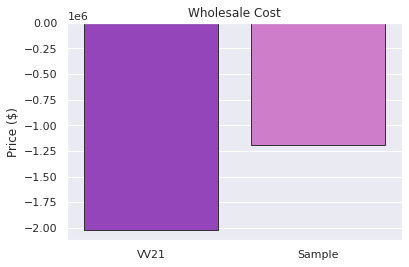

In [10]:
sns.barplot(x=list_of_brokers, y=[vv21_market_clearing['Cost'].sum(), sample_market_clearing['Cost'].sum()], palette = get_colors(list_of_brokers), linewidth=1.0, edgecolor=".2").set(ylabel='Price ($)', title='Wholesale Cost')
plt.show()

In [23]:
vv21_market_clearing['Cost'].sum() / vv21_market_clearing["Broker's_Cleared_Quantity"].sum()

-53.96791637163688

In [24]:
sample_market_clearing['Cost'].sum() / sample_market_clearing["Broker's_Cleared_Quantity"].sum()

-32.27519068001753